In [18]:
import numpy as np 
import pandas as pd

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
data, target = mnist["data"], mnist["target"]
data.shape

(70000, 784)

In [4]:
target.shape

(70000,)

In [19]:
target = target.astype(np.uint8)

# Visualizing the data

In [5]:
import matplotlib
import matplotlib.pyplot as plt

In [15]:
some_digit = data.sample(1).iloc[0].values
# print(some_digit.values)
some_digit_image = some_digit.reshape(28,28)

In [41]:
def random_digit(data):
    some_digit = data.sample(1).iloc[0].values
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image,cmap = matplotlib.cm.binary, interpolation="nearest")
    return some_digit

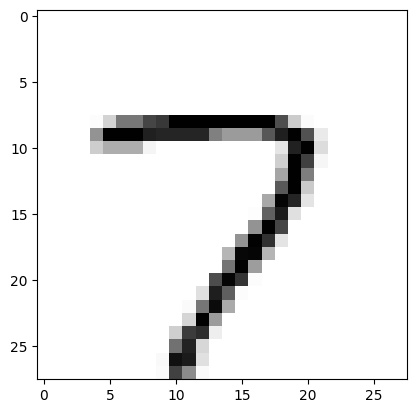

In [16]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary, interpolation="nearest")

In [29]:
target.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

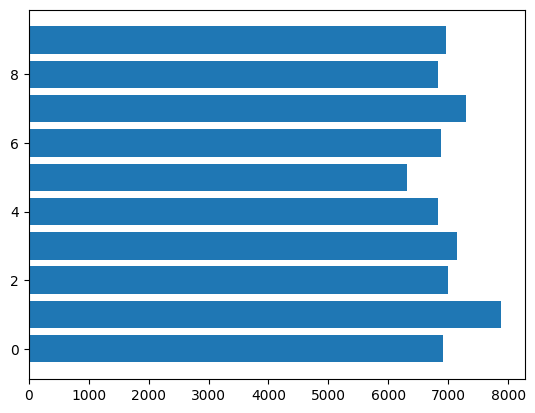

In [37]:
# Assuming target is your pandas Series
hist_data = target.value_counts()
plt.barh(hist_data.index, hist_data.values)
plt.show()

## test train split

In [20]:
data_train, data_test = data[:60000], data[60000:]

In [21]:
target_train, target_test = target[:60000],target[60000:]

## binary classifier for 7s

In [38]:
from sklearn.linear_model import SGDClassifier

In [39]:
y_train7 = (target_train == 7)
y_test7 = (target_test == 7) 

In [40]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(data_train, y_train7)

SGDClassifier(random_state=42)

/Users/reginacrespo/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

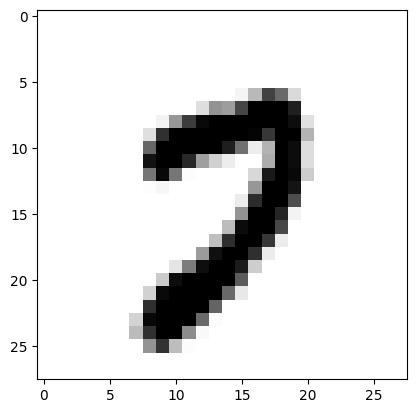

In [55]:
sgd_clf.predict([random_digit(data_test)])

## Validation

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
cross_val_score(sgd_clf, data_train, y_train7, cv = 3, scoring = "accuracy")

array([0.98105, 0.9735 , 0.95335])

In [58]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, data_train, y_train7, cv=3)

In [59]:
from sklearn.metrics import confusion_matrix

Each row in a confusion matrix represents an actual class, while each column repre‐
sents a predicted class

In [60]:
confusion_matrix(y_train7, y_train_pred)

array([[52581,  1154],
       [  688,  5577]])

true negatives: 52581 (non 7s)
false positives : 1154 (wrongly classified as 7s)
false negatives: 668 (wrongly classified as non 7s)
true positives: 5577 (correctly classified as 7s)

In [61]:
from sklearn.metrics import precision_score, recall_score

precision : accuracy of the positive predictions

In [62]:
precision_score(y_train7, y_train_pred) # == 5577 / (5577 + 1154)

0.8285544495617293

recall : the ratio of positive instances that are correctly detected by the classifier

In [63]:
recall_score(y_train7, y_train_pred) # == 5577 / (5577 + 688)

0.8901835594573024

In [64]:
from sklearn.metrics import f1_score

The F1 score favors classifiers that have similar precision and recall. 

In [65]:
f1_score(y_train7, y_train_pred)

0.858264081255771

En resumen: false negatives son los que si eran 7s, pero fueron clasificados como no 7s, mientras que true negatives, fueron clasificados correctamente como no 7s. En cambio, los true positives son los 7s que fueron correctamente clasificados como 7s, y los false positives, son los 7s que no son 7s pero fueron catalogados como 7s.

In [67]:
y_scores = cross_val_predict(sgd_clf, data_train, y_train7, cv = 3,
                            method="decision_function")

In [68]:
from sklearn.metrics import precision_recall_curve

In [70]:
precision, recalls, thresholds = precision_recall_curve(y_train7, y_scores)

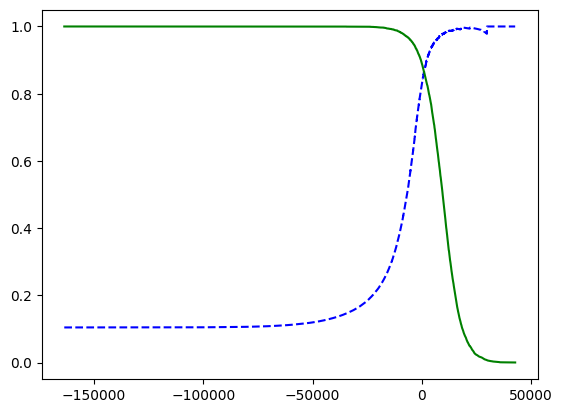

In [71]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plot_precision_recall_vs_threshold(precision, recalls, thresholds)
plt.show()

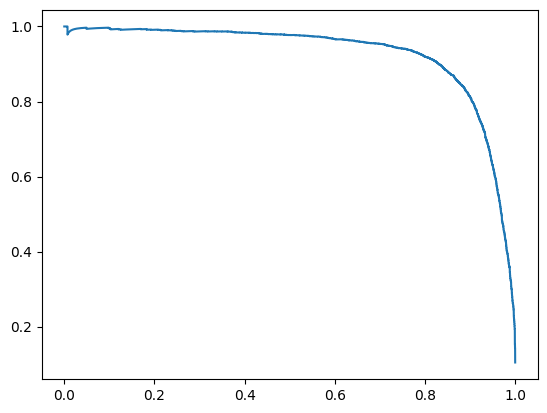

In [72]:
plt.plot(recalls, precision)